In [63]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from pathlib import Path
import sys
import rasterio

In [64]:
dir_add = Path('./kod/').resolve().as_posix()
sys.path.append(dir_add)
sys.path

['C:\\Users\\kemal\\Desktop\\Pythonremotesensing\\student_imProc-master',
 'D:\\Anaconda\\envs\\sen\\python38.zip',
 'D:\\Anaconda\\envs\\sen\\DLLs',
 'D:\\Anaconda\\envs\\sen\\lib',
 'D:\\Anaconda\\envs\\sen',
 '',
 'D:\\Anaconda\\envs\\sen\\lib\\site-packages',
 'D:\\Anaconda\\envs\\sen\\lib\\site-packages\\win32',
 'D:\\Anaconda\\envs\\sen\\lib\\site-packages\\win32\\lib',
 'D:\\Anaconda\\envs\\sen\\lib\\site-packages\\Pythonwin',
 'D:\\Anaconda\\envs\\sen\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\kemal\\.ipython',
 'C:/Users/kemal/Desktop/Pythonremotesensing/student_imProc-master/kod',
 'C:/Users/kemal/Desktop/Pythonremotesensing/student_imProc-master/kod',
 'C:/Users/kemal/Desktop/Pythonremotesensing/student_imProc-master/kod',
 'C:/Users/kemal/Desktop/Pythonremotesensing/student_imProc-master/kod']

In [65]:
import kmeansFun as km
from myImProc import myplot, myStretch

In [66]:
ad = 'C:/Users/kemal/Desktop/Pythonremotesensing/student_imProc-master/img_test/katowicekrakow.tif'
ar3 = rasterio.open(ad).read()
print(f'brc image: {ar3.shape}')
# update data with Sentinel coeficient - 1/10000
ar3 = np.array(ar3/10000,dtype = np.float32)

# convert brc to rcb
ar3 = np.transpose(ar3.copy(),(1,2,0))
print(f'rcb image: {ar3.shape}')

brc image: (11, 2508, 2824)
rcb image: (2508, 2824, 11)


In [67]:
data3 = np.reshape(ar3,(-1,ar3.shape[-1]))
print(data3.shape,'\n\n',data3[:5,:])

(7082592, 11) 

 [[0.000e+00 1.100e-03 9.000e-04 4.098e-01 4.101e-01 4.094e-01 4.000e-04
  4.110e-01 4.111e-01 4.136e-01 4.106e-01]
 [8.000e-04 5.000e-04 1.300e-03 4.089e-01 4.112e-01 4.099e-01 0.000e+00
  4.097e-01 4.093e-01 4.091e-01 4.097e-01]
 [0.000e+00 0.000e+00 0.000e+00 4.094e-01 4.111e-01 4.104e-01 0.000e+00
  4.086e-01 4.096e-01 4.088e-01 4.091e-01]
 [0.000e+00 0.000e+00 0.000e+00 4.085e-01 4.083e-01 4.089e-01 0.000e+00
  4.100e-01 4.087e-01 4.084e-01 4.094e-01]
 [0.000e+00 0.000e+00 6.000e-04 4.108e-01 4.097e-01 4.087e-01 1.000e-04
  4.107e-01 4.096e-01 4.103e-01 4.096e-01]]


In [68]:
ar31 = ar3[1000:,:1000,:].copy()
data31 = np.reshape(ar31,(-1,ar31.shape[-1]))
print(data31.shape,'\n\n',data31[:5,:])

(1508000, 11) 

 [[0.0889 0.1189 0.1029 0.1973 0.3721 0.4355 0.472  0.4651 0.316  0.3142
  0.2024]
 [0.0878 0.1175 0.1004 0.1958 0.3695 0.4314 0.4756 0.4631 0.3151 0.3135
  0.1996]
 [0.0867 0.1087 0.1035 0.166  0.2945 0.3321 0.4048 0.3574 0.3142 0.3159
  0.2164]
 [0.0854 0.1033 0.107  0.1651 0.2932 0.3297 0.3006 0.3555 0.3136 0.3159
  0.2156]
 [0.0898 0.1034 0.1119 0.1465 0.2073 0.242  0.2671 0.2681 0.3144 0.3014
  0.2248]]


In [69]:
k = 5
l,c,ci = km.myKmeans(data31,k,n=100,init=1)
rows,cols = ar31.shape[:2]
clusters1 = np.reshape(l,(rows,cols))

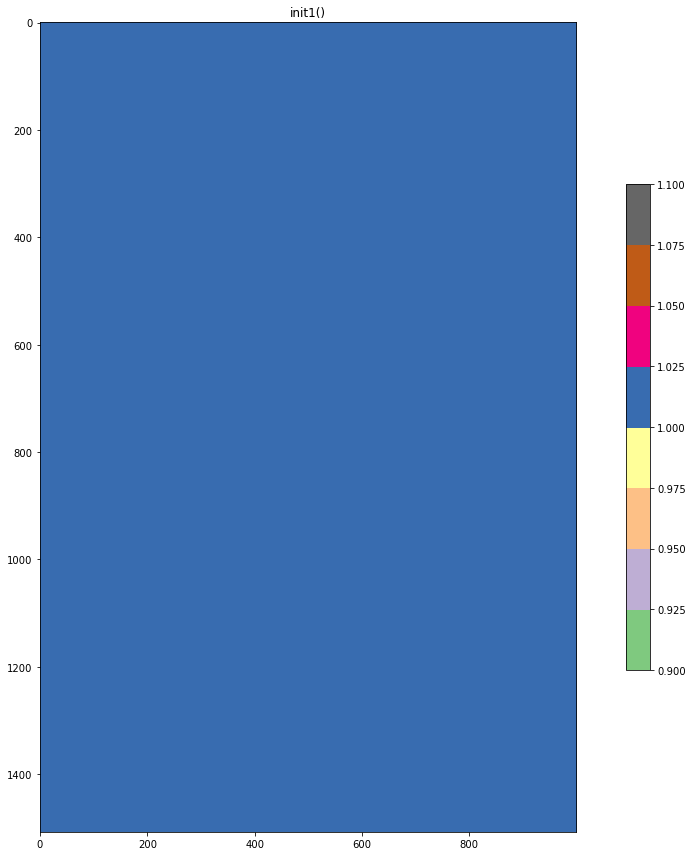

In [70]:
f = plt.figure(figsize=(14,12))
tmp=plt.imshow(clusters1,cmap=plt.cm.Accent);
plt.title(f'init1()');
f.colorbar(tmp, shrink=0.6);
plt.tight_layout();

In [71]:
# init2()
k = 5
l,c,ci = km.myKmeans(data31,k,n=100,init=2)
rows,cols = ar31.shape[:2]
clusters2 = np.reshape(l,(rows,cols))

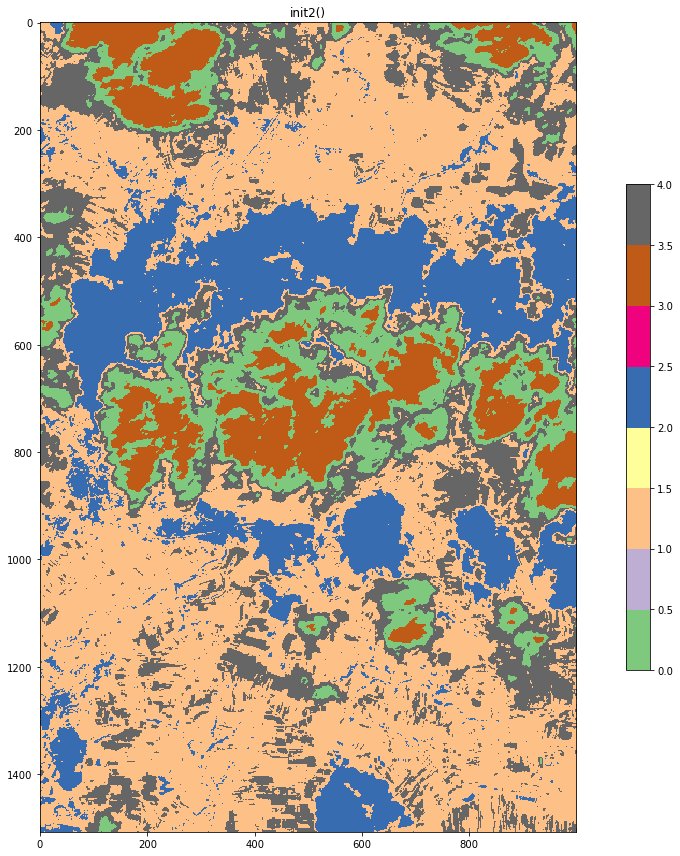

In [72]:
f = plt.figure(figsize=(14,12))
tmp = plt.imshow(clusters2,cmap=plt.cm.Accent);
plt.title(f'init2()');
f.colorbar(tmp, shrink=0.6);
plt.tight_layout()

In [73]:
# init3()
k=8
l,c,ci = km.myKmeans(data31,k,n=100,init=3)
rows,cols = ar31.shape[:2]
clusters3 = np.reshape(l,(rows,cols))

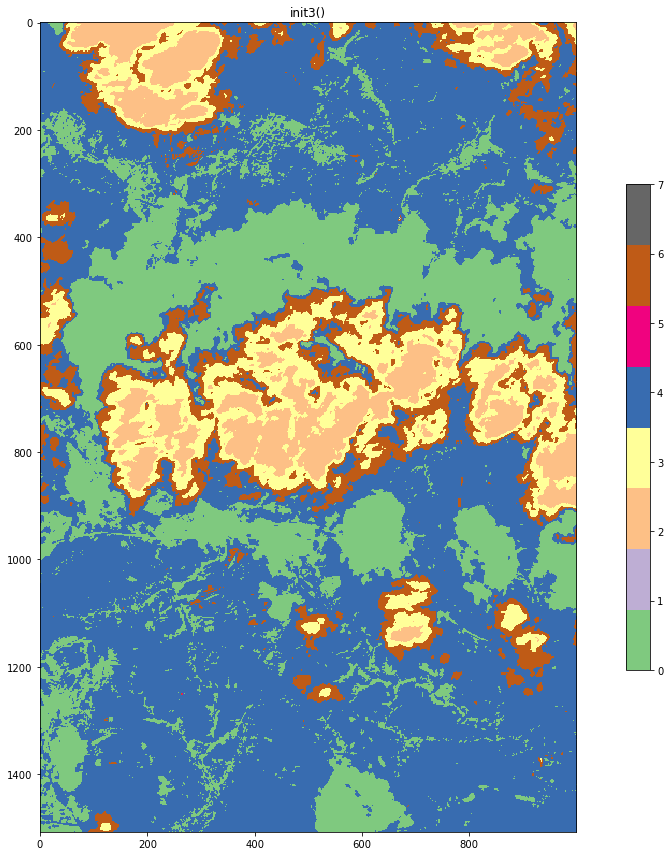

In [74]:
f = plt.figure(figsize=(14,12))
tmp=plt.imshow(clusters3,cmap=plt.cm.Accent);
plt.title(f'init3()');
f.colorbar(tmp, shrink=0.6);
plt.tight_layout();

<Figure size 1152x1008 with 0 Axes>

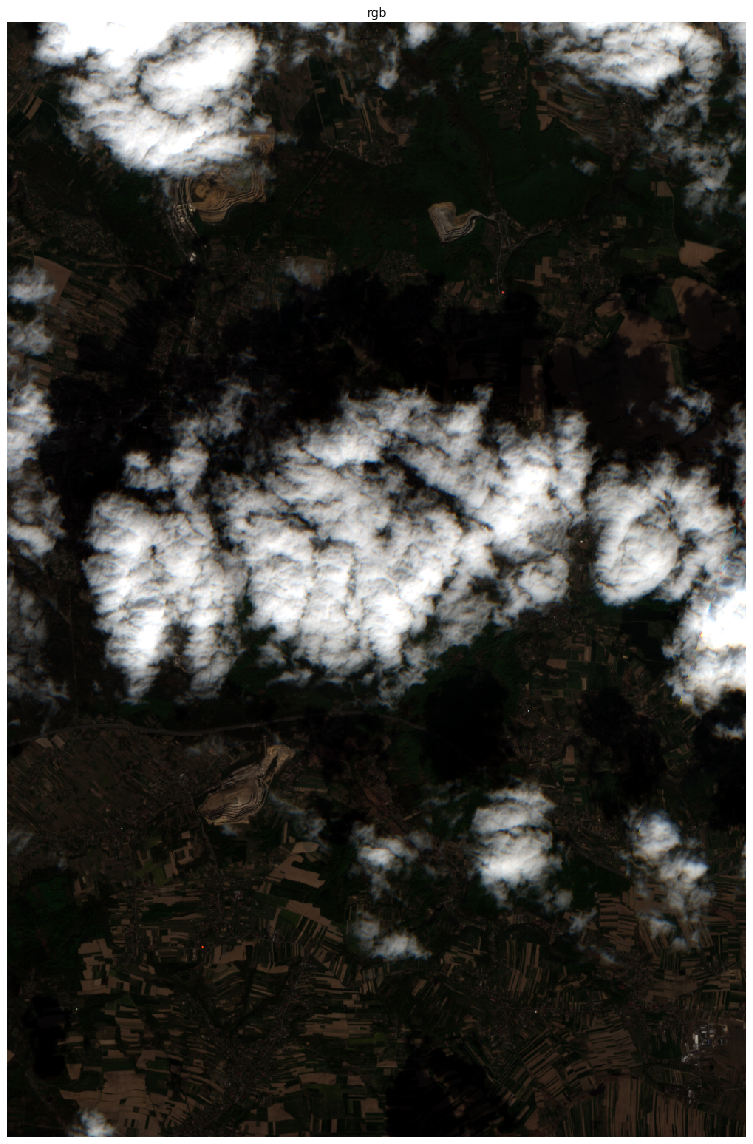

In [75]:
f = plt.figure(figsize=(16,14))
ar31st = myStretch(ar31)
myplot([ar31st[:,:,[2,1,0]]],title=['rgb'],size=(14,16))

<Figure size 1152x1008 with 0 Axes>

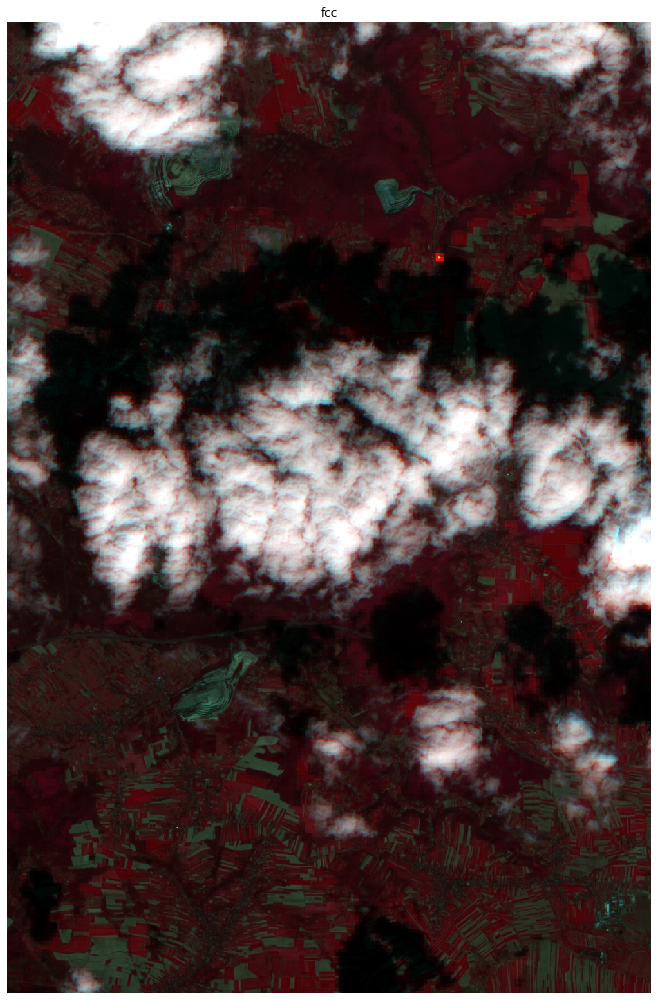

In [76]:
f = plt.figure(figsize=(16,14))
myplot([ar31st[:,:,[8,2,1]]],title=['fcc'],size=(16,14))

In [77]:
names = ['water','forest','soil','vegetation','urban']
code = [1,2,3,4,5]

In [78]:
current = [0,1,2,3,4]

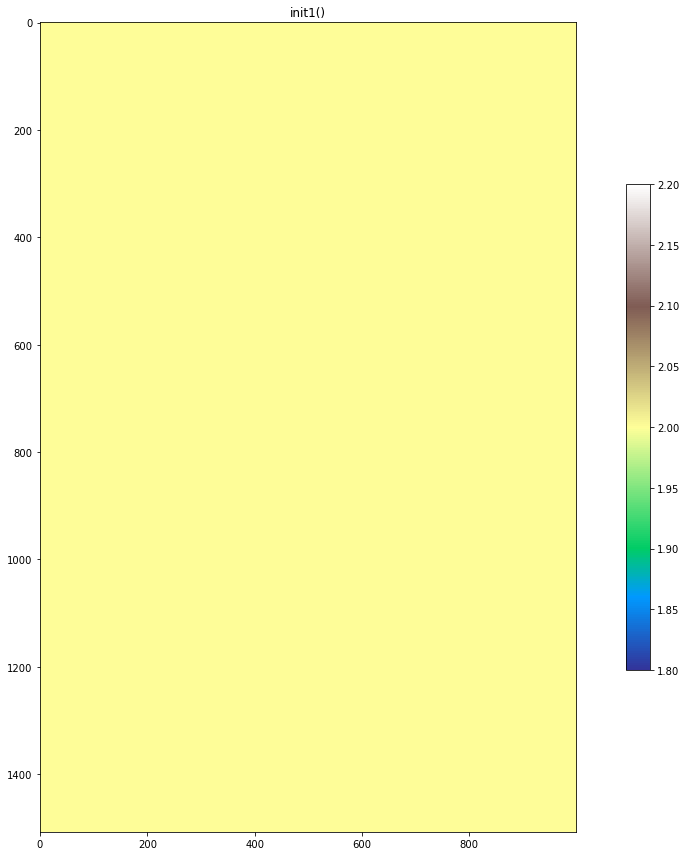

In [79]:
reclass1 = np.zeros_like(clusters1,dtype=np.uint8)
for i in range(len(current)):
    reclass1[clusters1==current[i]] = code[i]
    
f = plt.figure(figsize=(14,12))

tmp=plt.imshow(reclass1,cmap=plt.cm.terrain);
plt.title(f'init1()');
f.colorbar(tmp, shrink=0.6);
plt.tight_layout();  

In [80]:
k=8
current = [0,1,2,3,4,5,6,7]
code    = [1,3,5,5,3,2,4,6]

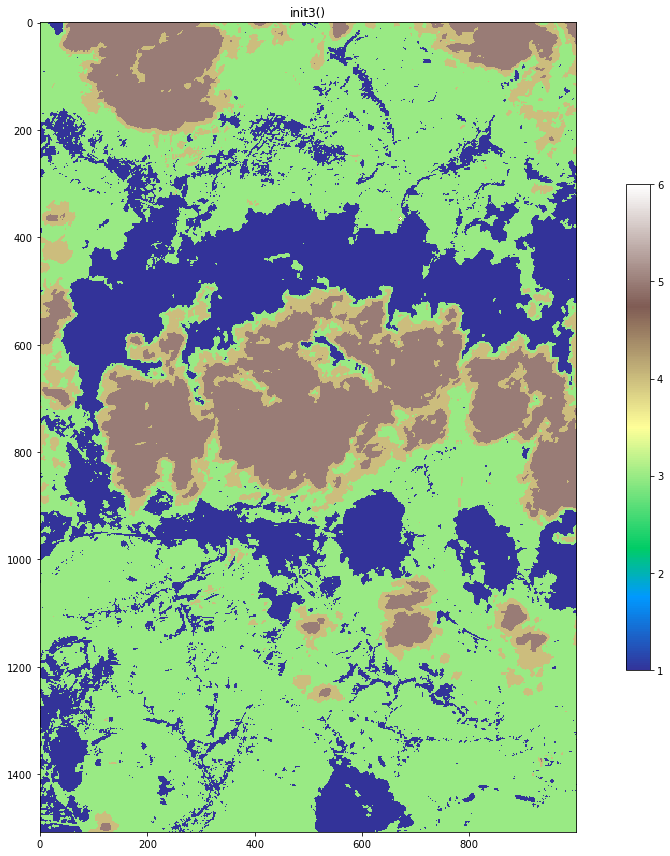

In [81]:
reclass3 = np.zeros_like(clusters3,dtype=np.uint8)
for i in range(k):
    reclass3[clusters3==current[i]] = code[i]
    
f = plt.figure(figsize=(14,12))
tmp=plt.imshow(reclass3,cmap=plt.cm.terrain);
plt.title(f'init3()');
f.colorbar(tmp, shrink=0.6);
plt.tight_layout();  